In [ ]:
import pandas as pd

In [6]:
reddit_comments =pd.read_csv(r'..\data\raw\reddit_comments_combined.csv')
reddit_comments.head()



Post ID                                        Post Title Comment ID  \
0  17i2fhi  Are you guys worried that AI will take your job?    k6rs0pq   
1  17i2fhi  Are you guys worried that AI will take your job?    k6rg2pa   
2  17i2fhi  Are you guys worried that AI will take your job?    k6ruz4g   
3  17i2fhi  Are you guys worried that AI will take your job?    k6rfq8z   
4  17i2fhi  Are you guys worried that AI will take your job?    k6rt4lj   

         Comment Author  Comment Score  \
0          Thisbymaster             26   
1     usernames_suck_ok             39   
2  ponzi_pyramid_digdug             18   
3    Battosai_Kenshin99             88   
4     Excuse_my_GRAMMER              7   

                                        Comment Body  Comment Created  
0  Try getting GitHub copilot to build a function...       1698461647  
1  The fact that employers don't want people to w...       1698455954  
2  Sometimes. Then I see what ai can output and d...       1698463171  
3  I do not understand people's fear of AI. Imagi...       1698455791  
4  Not really lol AI is just another tool \n\nI t...       1698462202

## Clean column name by lower and replace white space

In [8]:
#clean column name-1 change to lower letter and replace white space with _ null values
reddit_comments.columns = (
reddit_comments.columns.str.lower().str.replace(" ", "_").str.strip()
)

In [2]:
reddit_comments.to_csv(r'..\data\raw\ai_job_sentiments.csv', index=False, encoding='utf-8', sep=";")


NameError: name 'reddit_comments' is not defined

In [9]:
# 2. View nulls
print("Missing values per column:\n", reddit_comments.isnull().sum())

Missing values per column:
 post_id             0
post_title          0
comment_id          0
comment_author     89
comment_score       0
comment_body        0
comment_created     0
dtype: int64


In [12]:
 for col in reddit_comments.columns:
    if reddit_comments[col].isnull().sum() == 0:
        continue  # Skip columns with no missing values
    
    if reddit_comments[col].dtype == 'object':
        mode_val = reddit_comments[col].mode()
        if not mode_val.empty:
            reddit_comments[col] = reddit_comments[col].fillna(mode_val[0])
        else:
            reddit_comments[col] = reddit_comments[col].fillna("unknown")  # fallback
    else:
        mean_val = reddit_comments[col].mean()
        reddit_comments[col] = reddit_comments[col].fillna(mean_val)

In [15]:

reddit_comments['comment_author'] = reddit_comments['comment_author'].fillna('anonymous')



In [16]:
# Remove duplicates
reddit_comments = reddit_comments.drop_duplicates().reset_index(drop=True)

In [17]:
print("Remaining nulls:\n", reddit_comments.isnull().sum())


Remaining nulls:
 post_id            0
post_title         0
comment_id         0
comment_author     0
comment_score      0
comment_body       0
comment_created    0
dtype: int64


In [ ]:
import pandas as pd

In [19]:
Employment_projections = pd.read_csv(r'..\data\raw\Employment_projections.csv')
Employment_projections.head()


Occupation Title Occupation Code  \
0  Accountants and auditors    * Account Auditor*...      ="13-2011"   
1  Actors    * Actor Understudy* Actress* Dramati...      ="27-2011"   
2  Actuaries    * Actuarial Associate* Actuarial ...      ="15-2011"   
3  Acupuncturists    * Acupuncture Physician* Lic...      ="29-1291"   
4  Adhesive bonding machine operators and tenders...      ="51-9191"   

  Employment 2023 Employment 2033  Employment Change, 2023-2033  \
0         1,562.0         1,653.4                          91.4   
1            76.0            79.5                           3.5   
2            30.2            36.8                           6.6   
3            22.1            23.3                           1.2   
4            12.5            12.4                          -0.1   

   Employment Percent Change, 2023-2033  \
0                                   5.8   
1                                   4.5   
2                                  21.8   
3                                   5.5   
4                                  -0.5   

   Occupational Openings, 2023-2033 Annual Average Median Annual Wage 2024  \
0                                            130.8                  81,680   
1                                              8.6                     NaN   
2                                              2.2                 125,770   
3                                              1.3                  78,140   
4                                              1.2                  45,210   

       Typical Entry-Level Education  Education Code  \
0                  Bachelor's degree               3   
1            Some college, no degree               6   
2                  Bachelor's degree               3   
3                    Master's degree               2   
4  High school diploma or equivalent               7   

  Work Experience in a Related Occupation  Workex Code  \
0                                     NaN            4   
1                                     NaN            4   
2                                     NaN            4   
3                                     NaN            4   
4                                     NaN            4   

         Typical on-the-job Training  trCode  
0                                NaN       6  
1      Long-term on-the-job training       3  
2      Long-term on-the-job training       3  
3                                NaN       6  
4  Moderate-term on-the-job training       4

In [20]:
# 1. Clean column names
Employment_projections.columns = Employment_projections.columns.str.lower().str.replace(" ", "_").str.strip()

In [24]:
# 2. View nulls
print("Missing values per column:\n", Employment_projections.isnull().sum())

Missing values per column:
 occupation_title                                     0
occupation_code                                      0
employment_2023                                      0
employment_2033                                      0
employment_change,_2023-2033                         0
employment_percent_change,_2023-2033                 0
occupational_openings,_2023-2033_annual_average      0
median_annual_wage_2024                              6
typical_entry-level_education                        0
education_code                                       0
work_experience_in_a_related_occupation            719
workex_code                                          0
typical_on-the-job_training                        322
trcode                                               0
dtype: int64


In [31]:
print(df.columns.tolist())



['Occupation Title', 'Occupation Code', 'Employment 2023', 'Employment 2033', 'Employment Change, 2023-2033', 'Employment Percent Change, 2023-2033', 'Occupational Openings, 2023-2033 Annual Average', 'Median Annual Wage 2024', 'Typical Entry-Level Education', 'Education Code', 'Work Experience in a Related Occupation', 'Workex Code', 'Typical on-the-job Training', 'trCode']


In [32]:
df.columns = df.columns.str.lower().str.replace(" ", "_").str.replace(",", "").str.strip()
print(df.columns.tolist())


['occupation_title', 'occupation_code', 'employment_2023', 'employment_2033', 'employment_change_2023-2033', 'employment_percent_change_2023-2033', 'occupational_openings_2023-2033_annual_average', 'median_annual_wage_2024', 'typical_entry-level_education', 'education_code', 'work_experience_in_a_related_occupation', 'workex_code', 'typical_on-the-job_training', 'trcode']


In [37]:
df['work_experience_in_a_related_occupation'] = df['work_experience_in_a_related_occupation'].fillna('Not Required')


In [38]:
df['typical_on-the-job_training'] = df['typical_on-the-job_training'].fillna('None')


In [56]:
Employment_projections.head()


occupation_title occupation_code  \
0  Accountants and auditors    * Account Auditor*...      ="13-2011"   
1  Actors    * Actor Understudy* Actress* Dramati...      ="27-2011"   
2  Actuaries    * Actuarial Associate* Actuarial ...      ="15-2011"   
3  Acupuncturists    * Acupuncture Physician* Lic...      ="29-1291"   
4  Adhesive bonding machine operators and tenders...      ="51-9191"   

  employment_2023 employment_2033  employment_change,_2023-2033  \
0         1,562.0         1,653.4                          91.4   
1            76.0            79.5                           3.5   
2            30.2            36.8                           6.6   
3            22.1            23.3                           1.2   
4            12.5            12.4                          -0.1   

   employment_percent_change,_2023-2033  \
0                                   5.8   
1                                   4.5   
2                                  21.8   
3                                   5.5   
4                                  -0.5   

   occupational_openings,_2023-2033_annual_average median_annual_wage_2024  \
0                                            130.8                  81,680   
1                                              8.6                     NaN   
2                                              2.2                 125,770   
3                                              1.3                  78,140   
4                                              1.2                  45,210   

       typical_entry-level_education  education_code  \
0                  Bachelor's degree               3   
1            Some college, no degree               6   
2                  Bachelor's degree               3   
3                    Master's degree               2   
4  High school diploma or equivalent               7   

  work_experience_in_a_related_occupation  workex_code  \
0                                     NaN            4   
1                                     NaN            4   
2                                     NaN            4   
3                                     NaN            4   
4                                     NaN            4   

         typical_on-the-job_training  trcode  
0                                NaN       6  
1      Long-term on-the-job training       3  
2      Long-term on-the-job training       3  
3                                NaN       6  
4  Moderate-term on-the-job training       4

In [42]:
occupation_growth= pd.read_csv(r'..\data\clean\occupation_growth.csv')
occupation_growth.head()

Occupation Title Occupation Code Occupation Type  \
0           Total, all occupations      ="00-0000"         Summary   
1           Management occupations      ="11-0000"         Summary   
2                   Top executives      ="11-1000"         Summary   
3                 Chief executives      ="11-1011"       Line Item   
4  General and operations managers      ="11-1021"       Line Item   

  2023 Employment  2023 Percent of Industry  2023 Percent of Occupation  \
0        12,939.5                     100.0                         7.7   
1           857.7                       6.6                         6.5   
2           273.6                       2.1                         6.9   
3            12.7                       0.1                         4.0   
4           260.9                       2.0                         7.2   

  Projected 2033 Employment  Projected 2033 Percent of Industry  \
0                  13,049.5                               100.0   
1                     889.8                                 6.8   
2                     279.5                                 2.1   
3                      13.1                                 0.1   
4                     266.4                                 2.0   

   Projected 2033 Percent of Occupation  Employment Change, 2023-2033  \
0                                   7.5                         110.0   
1                                   6.3                          32.0   
2                                   6.6                           5.8   
3                                   4.0                           0.4   
4                                   6.9                           5.4   

   Employment Percent Change, 2023-2033  Occupation Sort  Display Level  \
0                                   0.8              NaN              0   
1                                   3.7              2.0              1   
2                                   2.1              3.0              2   
3                                   3.2              4.0              3   
4                                   2.1              5.0              3   

                                 source_file Industry Title Industry Code  \
0  National_Employment_Matrix_IND_31-330.csv            NaN           NaN   
1  National_Employment_Matrix_IND_31-330.csv            NaN           NaN   
2  National_Employment_Matrix_IND_31-330.csv            NaN           NaN   
3  National_Employment_Matrix_IND_31-330.csv            NaN           NaN   
4  National_Employment_Matrix_IND_31-330.csv            NaN           NaN   

  Industry Type  Industry Sort  
0           NaN            NaN  
1           NaN            NaN  
2           NaN            NaN  
3           NaN            NaN  
4           NaN            NaN

In [43]:
# 2. Clean column names
df.columns = df.columns.str.lower().str.replace(" ", "_").str.replace(",", "").str.strip()

In [44]:
# 3. Check missing values
print("Missing values before cleaning:\n", df.isnull().sum())


üîç Missing values before cleaning:
 occupation_title                                  0
occupation_code                                   0
employment_2023                                   0
employment_2033                                   0
employment_change_2023-2033                       0
employment_percent_change_2023-2033               0
occupational_openings_2023-2033_annual_average    0
median_annual_wage_2024                           6
typical_entry-level_education                     0
education_code                                    0
work_experience_in_a_related_occupation           0
workex_code                                       0
typical_on-the-job_training                       0
trcode                                            0
dtype: int64


In [46]:
# Drop rows where median wage is missing
df = df.dropna(subset=['median_annual_wage_2024'])

In [47]:
# 3. Check missing values
print("üîç Missing values before cleaning:\n", df.isnull().sum())


üîç Missing values before cleaning:
 occupation_title                                  0
occupation_code                                   0
employment_2023                                   0
employment_2033                                   0
employment_change_2023-2033                       0
employment_percent_change_2023-2033               0
occupational_openings_2023-2033_annual_average    0
median_annual_wage_2024                           0
typical_entry-level_education                     0
education_code                                    0
work_experience_in_a_related_occupation           0
workex_code                                       0
typical_on-the-job_training                       0
trcode                                            0
dtype: int64


In [49]:
display(occupation_growth.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3834 entries, 0 to 3833
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Occupation Title                      3810 non-null   object 
 1   Occupation Code                       3810 non-null   object 
 2   Occupation Type                       3810 non-null   object 
 3   2023 Employment                       3834 non-null   object 
 4   2023 Percent of Industry              3834 non-null   float64
 5   2023 Percent of Occupation            3834 non-null   float64
 6   Projected 2033 Employment             3834 non-null   object 
 7   Projected 2033 Percent of Industry    3834 non-null   float64
 8   Projected 2033 Percent of Occupation  3834 non-null   float64
 9   Employment Change, 2023-2033          3834 non-null   float64
 10  Employment Percent Change, 2023-2033  3834 non-null   float64
 11  Occupation Sort  

None

In [53]:
# 2. Clean column names
occupation_growth.columns = (
    occupation_growth.columns
    .str.lower()
    .str.replace(" ", "_")
    .str.replace(",", "")
    .str.strip()
)

In [54]:
# 3. View actual column names to identify which need conversion
print("üìã Column names:")
print(occupation_growth.columns.tolist())

üìã Column names:
['occupation_title', 'occupation_code', 'occupation_type', '2023_employment', '2023_percent_of_industry', '2023_percent_of_occupation', 'projected_2033_employment', 'projected_2033_percent_of_industry', 'projected_2033_percent_of_occupation', 'employment_change_2023-2033', 'employment_percent_change_2023-2033', 'occupation_sort', 'display_level', 'source_file', 'industry_title', 'industry_code', 'industry_type', 'industry_sort']


In [55]:
numeric_cols = ['2023_employment', 'projected_2033_employment']

for col in numeric_cols:
    # Remove commas and convert to numeric
    occupation_growth[col] = occupation_growth[col].replace(r',', '', regex=True)
    occupation_growth[col] = pd.to_numeric(occupation_growth[col], errors='coerce')


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Reddit comments dataset
reddit_comments = pd.read_csv(r'../data/raw/reddit_comments_combined.csv')

# Employment projections dataset
employment_projections = pd.read_csv(r'../data/raw/Employment_projections.csv')

In [10]:
# Clean columns (lowercase and replace spaces with underscores)
reddit_comments.columns = reddit_comments.columns.str.lower().str.replace(" ", "_").str.strip()
employment_projections.columns = employment_projections.columns.str.lower().str.replace(" ", "_").str.strip()

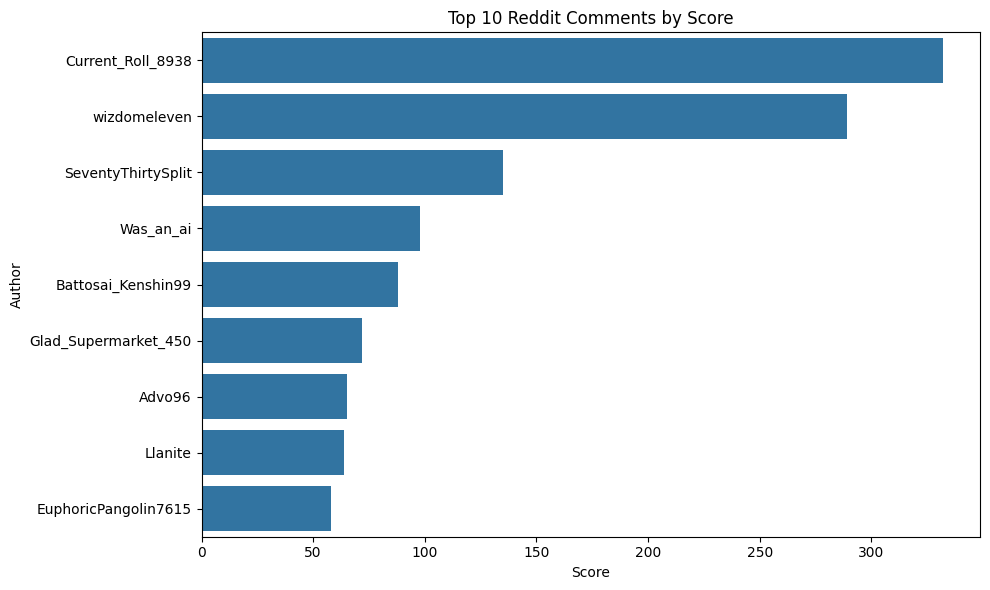

In [12]:
top_comments = reddit_comments.sort_values('comment_score', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_comments, x='comment_score', y='comment_author')
plt.title('Top 10 Reddit Comments by Score')
plt.xlabel('Score')
plt.ylabel('Author')
plt.tight_layout()
plt.show()

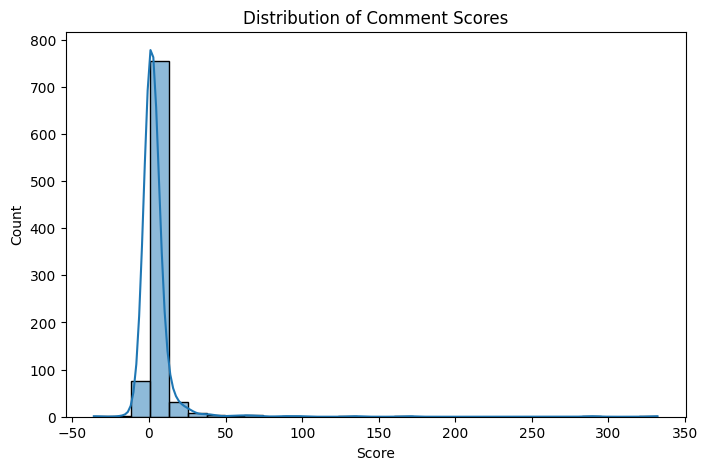

In [14]:
plt.figure(figsize=(8, 5))
sns.histplot(reddit_comments['comment_score'], bins=30, kde=True)
plt.title('Distribution of Comment Scores')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

In [18]:
# Sort by employment change
top_growth = employment_projections.sort_values('employment_change_2023-2033', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.lineplot(data=top_growth, x='occupation_title', y='employment_change_2023-2033', marker='o')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Jobs with Highest Employment Growth (2023‚Äì2033)')
plt.ylabel('Employment Change')
plt.xlabel('Occupation')
plt.tight_layout()
plt.show()


KeyError: 'employment_change_2023-2033'

## Cleaning invalid Values/row

## Formatting data types
Dealing with Null values
Identify any columns with null or missing values. Identify how many null values each column has. You can use the isnull() function in pandas to find columns with null values.

Decide on a strategy for handling the null values. There are several options, including:

Drop the rows or columns with null values
Fill the null values with a specific value (such as the column mean or median for numerical variables, and mode for categorical variables)
Fill the null values with the previous or next value in the column

-- Implement your chosen strategy to handle the null values. You can use the fillna() function in pandas to fill null values or dropna() function to drop null values.

Verify that your strategy has successfully handled the null values. You can use the isnull() function again to check if there are still null values in the dataset.

Remember to document your process and explain your reasoning for choosing a particular strategy for handling null values.

After formatting data types, as a last step, convert all the numeric variables to integers.

 ## Dealing with duplicates
Use the .duplicated() method to identify any duplicate rows in the dataframe.

Decide on a strategy for handling the duplicates. Options include:

Dropping all duplicate rows
Keeping only the first occurrence of each duplicated row
Keeping only the last occurrence of each duplicated row
Dropping duplicates based on a subset of columns
Dropping duplicates based on a specific column
Implement your chosen strategy using the drop_duplicates() function.

Verify that your strategy has successfully handled the duplicates by checking for duplicates again using .duplicated().

Remember to document your process and explain your reasoning for choosing a particular strategy for handling duplicates.

Save the cleaned dataset to a new CSV file.

Hint: after dropping duplicates, reset the index to ensure consistency.

## Creating functions on a separate py file
Put all the data cleaning and formatting steps into functions, and create a main function that performs all the cleaning and formatting.

Write these functions in separate .py file(s). By putting these steps into functions, we can make the code more modular and easier to maintain.

Hint: autoreload module is a utility module in Python that allows you to automatically reload modules in the current session when changes are made to the source code. This can be useful in situations where you are actively developing code and want to see the effects of changes you make without having to constantly restart the Python interpreter or Jupyter Notebook kernel.

## Analyzing Clean and Formated Data